<a href="https://colab.research.google.com/github/johnsigma/meuPortifolio/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Esse é meu quarto projeto do curso Data Science na Prática, do professor Carlos Melo, e meu primeiro projeto em que utilizo *machine learning* em dados.

Neste projeto, vamos abordar fraudes em cartões de crédito que são um grande problemas para instituições financeiras como bancos e *fintechs*. De acordo com [essa matéria](https://glo.bo/2YFtEjH) o Brasil é segundo páis da America Latina com mais fraudes no cartão de crédito em compras online.

[Nesta outra matéria](https://glo.bo/2VmOCSw) diz que apenas no Brasil cerca de 12 milhões de pessoas já foram vítimas de algum tipo de fraude financeira, em valores as fraudes financeira ultrapassaram cerca de R$ 1,8 bilhão de prejuízo para as vítimas.

![alt text](https://github.com/johnsigma/meuPortifolio/blob/master/imagens/cartao_credito2.jpg?raw=true)

<a href='https://www.freepik.com/free-photos-vectors/business'>Business vector created by pikisuperstar - www.freepik.com</a>



Dentra essas fraudes, aquelas envolvendo cartões de crédito clonados são cerca de 25%, 14% são de contratação de serviços ou compra indevida de itens usando documentos falsos, perdidos ou roubados da vítima (inclusive cartões de crédito), somando essas fraudes temos que em 39% das fraudes financeiras citadas na matéria podem ter sido cometidas utilizando cartões de crédito, seja ele clonado ou tendo suas informações roubadas. Por isso é de extrema importância a detecção de fraudes em cartões de créditos pois a sua não-detecção pode acarretar em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Outro ponto a mencionar é a quantidade de falsos positivos detectados nos dados das fraudes de cartões de crédito, isto é, quando alguém realiza uma compra em seu prórprio cartão mas seu cartão é bloqueado antes da compra ser concertizada pois foi reconhecida como uma fraude - o que gera estresse e constragimento para o cliente que quer realizar a compra.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que utilizaremos neste projeto foram pegos de uma competição do [Kaggle](https://www.kaggle.com/) e você pode acessar esta competição através [deste link](https://www.kaggle.com/mlg-ulb/creditcardfraud).

Os dados foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* foi feito com base em operações financeiras que ocorreram em um período de dois dias do ano de 2013. Neste *dataset* foram classificadas 492 fraudes em meio a quase 290 mil transações.

As fraudes representam 0,17% do total de transações feitas o que torna nosso conjunto de dados extremamente desbalanceado.

Outro detalhe é que as colunas - ou *features* - do nosso *dataset* são todas numéricas e por problemas ligados à privacidade e segurança (por se tratar de dados pessoas de pessoas) elas foram todas desconfiguradas. Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$. As únicas colunas que não foram desconfiguradas foram as colunas `Amount` e `Time`.


![alt text](https://github.com/johnsigma/meuPortifolio/blob/master/imagens/cartao_credito3.jpg?raw=true)

<a href='https://www.freepik.com/free-photos-vectors/business'>Business vector created by freepik - www.freepik.com</a>>

Outro ponto importante é que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Princial Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor ou igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

Todas essas informações foram obtidas no link da competição no Kaggle e podem ser acessadas [neste link](https://www.kaggle.com/mlg-ulb/creditcardfraud).


In [87]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

sns.set_style()

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [ ]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

É nessa fase que vamos conhecer nossos dados e prepará-los para nosso modelo de *machine learning*. Vamos ver as variáveis do nosso *dataset*, verificar os valores ausentes e plotar alguns gráficos que nos ajudarão a entender melhor nosso conjunto de dados.

### Visualização do *dataset*
Vamos ver as cinco primeiras linhas do nosso *dataset* para vermos suas colunas e distribuições.

In [ ]:
print('Dimensões do dataset',
      f'\nEntradas: {df.shape[0]}',
      f'\nColunas: {df.shape[1]}\n')
df.head()

Dimensões do dataset 
Entradas: 284807 
Colunas: 31



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Vimos que temos 284807 entradas, no nosso caso transações, e 31 colunas, sendo elas (como explicado anteriormente) 28 colunas transformadas e 3 colunas que sabemos quais são são elas:


*   `Time` - contém, em segundos, o tempo decorrido entre cada transação e a primeira transação do conjunto de dados. Por exemplo a terceira transação aconteceu 1 segundo depois da primeira, e assim sucessivamente.
*   `Amount` - que é o preço da transação.
*   `Class` - seria nosso vetor alvo que diz se uma transação foi classificada como fraudulenta ou não. Se assume o valor 1 em caso de fraude e 0 em transações normais



### Resumo estatístico do *dataframe*

Utilizando o método `describe` podemos ver algumas informações estatísticas dos nossos dados, como a média, mediana, desvio padrão, etc...

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Vemos que as colunas `Time` e `Amount` estão bem desbalanceadas olhando a média (`mean`) e o desvio padrão (`std`). Percebemos também que 75% dos valores de `Amount` estão abaixo de 78 enquanto o valor máximo passa de 25691, o que nos diz que essa coluna tem muitos dados dados desbalanceados. Mais à frente vamos ver o balanceamento do nosso *dataset* e ver se precisamos balanceá-lo ou não.

### Valores ausentes

Vamos agora verificar a porcentagem de valores ausentes do nosso *dataset* pra sabermos como lidar melhor com o balanceamento.

In [ ]:
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

Vemos que nosso *dataset* está todo completo, não já valores ausentes. O que facilita nossa vida na hora de balancear os dados.

### Gráficos

Nessa seção vamos plotar gráficos para sabermos lidar melhor com nosso conjunto de dados. Vamos plotar gráficos de barras para vermos a distribuição do nosso *dataset*, dois histogramas para nossas varáveis conhecidade (`Time` e `Amount`), um gráfico de caixa para a variável `Amount` quando houve fraude e uma matriz de correlação.

#### Gráfico de barras para distribuição para as Classes

Para vermos como a coluna `Class` está distribuída, vamos plotar um gráfico de barras. Lembrando que a coluna `Class` é a coluna onde nos diz se uma transação é fraudulenta ou não. Se a `Class` de uma entrada for 0 quer dizer que a transação não é fraudulenta. Se for 1 quer dizer que a transação é fraudulenta.

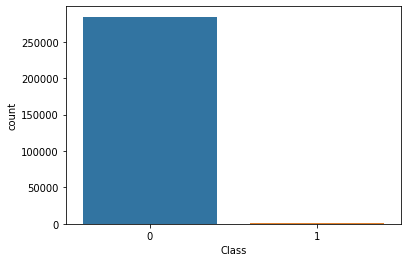

In [ ]:
# plotando o gráfico para Class
sns.countplot(x='Class', data=df);

No gráfico acima vemos que a coluna `Class` está bem desbalanceada, com quase todas as entradas como 0, ou seja, são transações normais.

Vamos ver como está o balanceamento dessas classes.

In [ ]:
# ver o balanceamento das classes
print(f'Transações normais (Classe 0): {df.Class.value_counts()[0]}')
print(f'Transações fraudulentas (Classe 1): {df.Class.value_counts()[1]}')

# ver a porcentagem de transações fraudolentas
print(f'\nAs transações fraudulentas representam {(df[df.Class == 1].shape[0] / df[df.Class == 0].shape[0])*100:.2f}% do dataset.')

Transações normais (Classe 0): 284315
Transações fraudulentas (Classe 1): 492

As transações fraudulentas representam 0.17% do dataset.


Como vimos no gráfico e na célula de código acima, nosso *dataset* está bem desbalanceado com as transações fraudulentas representando apenas 0.17% do *dataset*. O que já é de se esperar pois há muito mais transações normaos do que fraudulentas no mundo.

#### Histogramas

A seguir vamos plotar alguns histogramas para vermos a distribuição das variáveis `Time` e `Amount` levando em consideração a `class`.

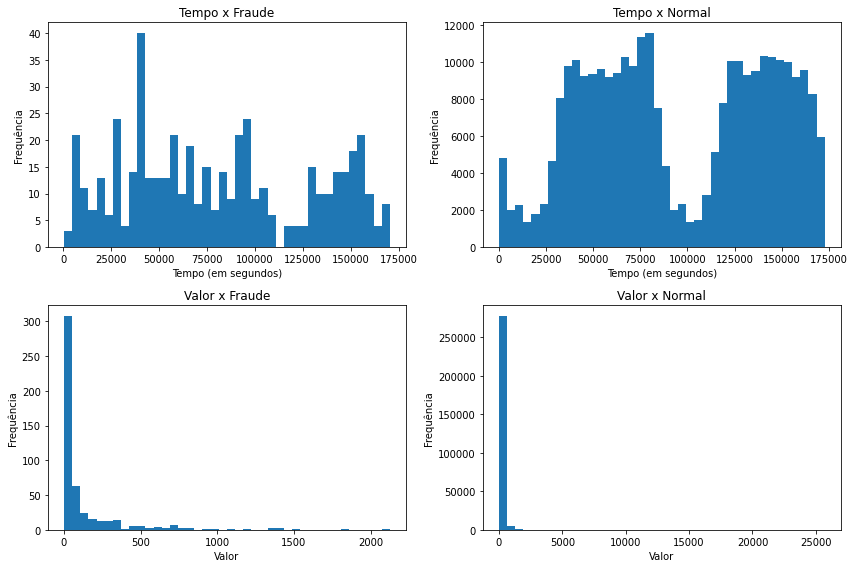

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

num_bins = 40

ax[0][0].hist(df.loc[df.Class == 1]['Time'], bins=num_bins)
ax[0][0].set_title('Tempo x Fraude')
ax[0][0].set_xlabel('Tempo (em segundos)')
ax[0][0].set_ylabel('Frequência')

ax[0][1].hist(df.loc[df.Class == 0]['Time'], bins=num_bins)
ax[0][1].set_title('Tempo x Normal')
ax[0][1].set_xlabel('Tempo (em segundos)')
ax[0][1].set_ylabel('Frequência')

ax[1][0].hist(df.loc[df.Class == 1]['Amount'], bins=num_bins)
ax[1][0].set_title('Valor x Fraude')
ax[1][0].set_xlabel('Valor')
ax[1][0].set_ylabel('Frequência')

ax[1][1].hist(df.loc[df.Class == 0]['Amount'], bins=num_bins)
ax[1][1].set_title('Valor x Normal')
ax[1][1].set_xlabel('Valor')
ax[1][1].set_ylabel('Frequência')

plt.tight_layout()

Nos gráficos acima não podemos tirar nenhuma conclusão alguma definitiva. Mas nos gráficos do `Amount` (os que estão abaixo) dá para perceber que há muitos valores *outliers* (que são valores que tendem ao extremo e se distanciam muito da média). Para ter uma visão mais clara dos *outilers* vamos plotar dois gráficos de caixa (***boxplot***).

#### Boxplots

Como dito anteriormente vamos plotar dois *boxplots* para a coluna `Amount`. Um gráfico será com as transações normais e outro com as transações fraudulentas.

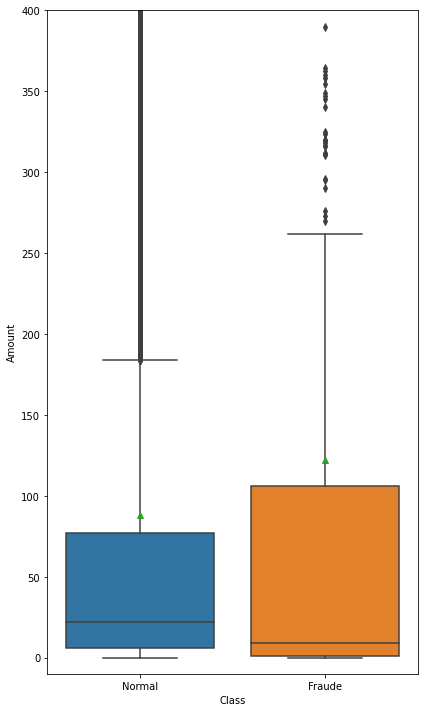

In [29]:
fig, ax = plt.subplots(figsize=(6,10))

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
plt.ylim((-10, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

Vimos que a distribuição para as duas classes estão bem diferentes, o que pode contribuir para o treinamento do modelo de *machine learning*. Percebemos também que, por mais diferente seja a distribuição das duas classes, a classe **Fraude** contempla vários valores, desde valores pequenos a valores muito altos (muitos deles considerados *outliers*).

#### Matriz de Correlação

Agora vamos plotar uma matriz de correlação para vermos o quanto nossas variáveis se relacionam com as outras.

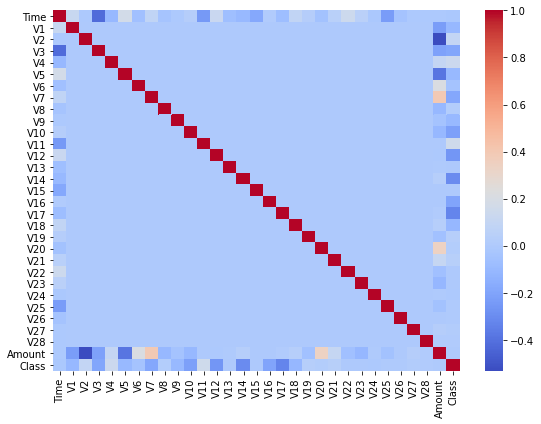

In [55]:
# plotando uma matriz de correlação
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(df.corr(), ax=ax, cmap='coolwarm')
plt.tight_layout()

Plotando a matriz de correlação vemos que nossa coluna `Class` não se relaciona muito bem com as outras variáveis. Podemos ver também que a coluna `Amount` se relaciona relativamente bem com as colunas `V7` e `V20`.

Ao fim da nossa análise exploratória, percebemos que:

*  nosso *dataset* está muito desbalanceado
*  as transações fraudulentas representam apenas 0,17% do total de transações
*  as colunas `Time` e `Amount` não estão padronizadas com as outras
*  nossas variáveis não tem muita correlação
*  a coluna `Amount` possui muitos valores *outliers*

## Preparação dos Dados

Será nessa etapa que vamos preparar nosso *dataset* para treinar nosso modelo de *machine leraning*. Como se trata de um problema de classificação (uma transação é fraudulenta ou não) vamos utilizar a Regressão Logística. Nessa etapa vamos:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste
* Balancear o conjunto de dados para melhorar a performance para a classe 1 (quando há fraude)

### Padronizar `Time` e `Amount`

Vamos utilizar o método `StandardScaler` para padronizar os dados das colunas `Time` e `Amount`.

In [72]:
# copiando o dataset
df_clean = df.copy()

# padronizando os dados
scaler = StandardScaler()
df_clean.Time = scaler.fit_transform(df_clean.Time.values.reshape(-1, 1))
df_clean.Amount = scaler.fit_transform(df_clean.Amount.values.reshape(-1, 1))

# ver as 5 primeiras entradas
df_clean.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Dividir nosso conjunto de dados entre dados de teste e treino
Antes de balancear nossos dados, devemos separar nossos dados entre treino e teste. Os dados de treino servem para treinar nosso modelo de *machine leraning*, já os dados de teste serve para testar nosso modelo já treinado e ver o quanto ele acerta com dados inéditos e compará-los.

In [73]:
# separar os dados em treino e teste
X = df_clean.drop('Class', axis=1)
y = df_clean.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balancear os dados

Para balancear nossos dados vamos utilizar a biblioteca `imblearn`, que aplica técnicas de balanceamento de dados. No nosso caso vamos utilizar a *Under-sampling* que balancea os dados preservando nossa classe minoritária (nesse caso a classe 1 do nosso *dataset*).

Classe 0 (transação normal): 369
Classe 1 (trasação fraudulenta): 369



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


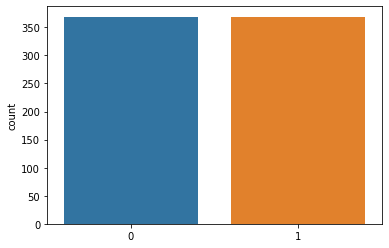

In [74]:
# usar o under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(f'Classe 0 (transação normal): {pd.Series(y_rus).value_counts()[0]}')
print(f'Classe 1 (trasação fraudulenta): {pd.Series(y_rus).value_counts()[1]}\n')

# plotar um gráfico de barras para ver a distribuição das classes
sns.countplot(y_rus);

Vemos que agora nossos dados estão muito mais balanceados, é só comparar com nosso gráfico de barras feito anteriormente para conferir.

Anteriormente havíamos plotado uma matriz de dipersão que não nos dizia nada, depois desse balanceamento vamos plotá-la novamente e vermos a diferença entre as duas.

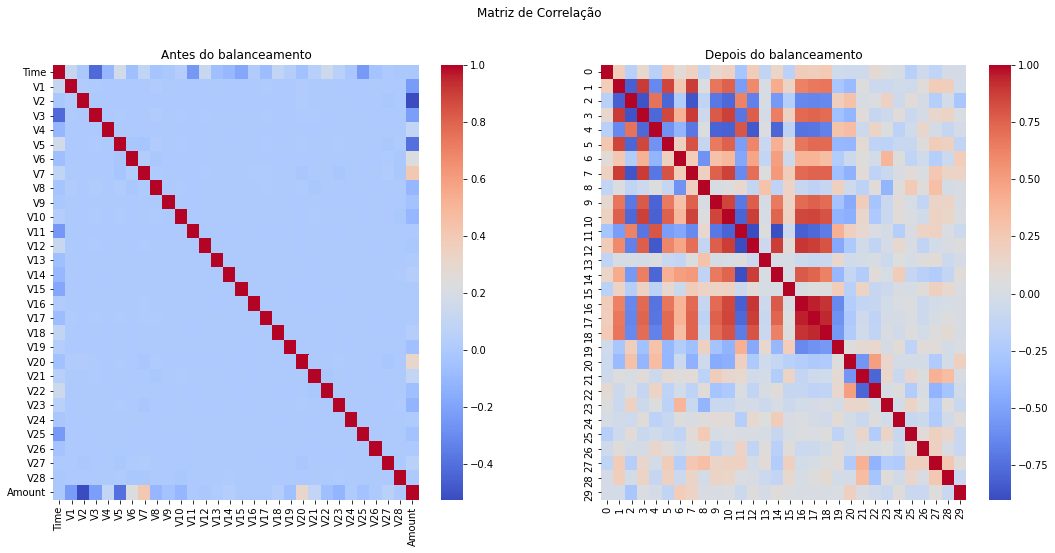

In [75]:
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, ax=ax[0], cmap='coolwarm')
ax[0].set_title('Antes do balanceamento')

sns.heatmap(corr_rus, ax=ax[1], cmap='coolwarm')
ax[1].set_title('Depois do balanceamento')

plt.show()

Como mostrado acima, agora podemos ver mais claramente as correlações entre as colunas.

## Modelo de *Machine Learning*

Agora chegou o momento de construirmos e treinarmos nosso modelo de *machine learning* e como dito anteriormente ele será feito como um modelo de Regressão Logística pois precisamos de um modelo classificador.

Vamos utilizar `X_rus` e `y_rus` para treinar nosso modelo pois eles são os dados balanceados.


In [108]:
# instanciar e treinar o modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazer as previsões nos dados de teste
y_pred = model.predict(X_test)

## Avaliar o desempenho do modelo

Com nosso modelo já treinado e nossas previsões já feitas, vamos agora avaliar o desempenho do nosso modelo.

Em alguns tipos de problemas devemos sempre tentar melhorar a acurácia do nosso modelo. Mas no nosso problema de detecção de fraudes mais importante do que a acurácia seria nosso recall, pois nossa acurácia nos diz o quanto nosso modelo tá acertando no geral, mas nosso modelo tem que priorizar detectar qual trasação é uma fraude. Não adianta meu modelo detectar 99% das transações normais mas detectar apenas 50% das fraudes.

A seguir vamos ver nossas métricas imprimindo uma matriz de confusão, um relatório de classificação, bem como a acurácia e o recall do modelo.

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

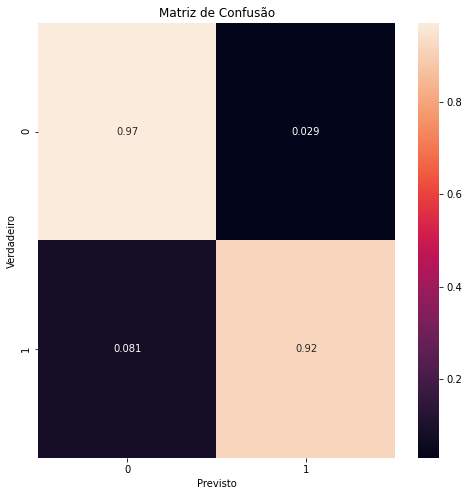

In [109]:
# plotar a matriz de confusão
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')
plt.show()

Na matriz de confusão vemos que nosso modelo:
*  acertou 97% das detecções de transações normais
*  acertou 92% das detecções de transações fraudulentas
*  detectou, erroneamente, 8,1% de transações normais quando na verdade elas eram fraudulentas
*  detectou, erroneamente, 2,9% de transações fraudulentas quando na verdade elas eram normais

In [110]:
# imprimindo o relatório de classificação
print(f'Relatório de Classificação:\n\n{classification_report(y_test, y_pred, digits=4)}')

Relatório de Classificação:

              precision    recall  f1-score   support

           0     0.9999    0.9709    0.9852     71079
           1     0.0518    0.9187    0.0981       123

    accuracy                         0.9708     71202
   macro avg     0.5258    0.9448    0.5416     71202
weighted avg     0.9982    0.9708    0.9836     71202



In [116]:
# imprimir a acurácia do modelo
print(f'Acurácia: {accuracy_score(y_test, y_pred)*100:.4f}%')

Acurácia: 97.0815%


In [117]:
# imprimir o recall do modelo
print(f'Recall: {recall_score(y_test, y_pred)*100:.4f}%')

Recall: 91.8699%


Vemos que nosso modelo teve 97% de acurácia. A acurácia nos diz a porcentagem de acerto do nosso modelo, ou seja, em 97% dos casos nosso modelo acertou classificando transações normais ou fraudulentas.

Isso não quer dizer que nosso modelo acertou 97% das vezes em que classificou como fraudulentas as transações, o que nos diz isso é o *Recall*.

No nosso caso o *Recall* foi de quase 92%, o que quer dizer que nosso modelo foi capaz de detectar corretamente quase 92% de todas as transações fraudulentas.

## Comparando com outro modelo de *machine learning*

Montamos um modelo de Regressão Linear para detecção de fraudes em cartões de crédito e vimos suas métricas, o quanto ele acertou, etc. Mas esse não é o único modelo de *machine learning* que podemos instanciar e treinar.

A seguir vamos criar um modelo de Árvore de Decisão para Classificação, treiná-lo e comparar os resultados obtidos com esse modelo com os resultados obtidos pelo modelo de Regressão Linear. Se você quiser saber mais sobre como funciona uma Árvore de Decisão acesse [este link](http://www.r2d3.us/uma-introducao-visual-ao-aprendizado-de-maquina-1/), lá tem uma explicação bem intuitiva e visual de como funciona esse modelo, e o melhor, é em português.

### Instanciando e treinando o modelo

Esta parte é parecida com a outra de Regressão Logística, vamos instanciar o modelo com 4 níveis de profundidade (`max_depth`). Depois vamos treinar nosso modelo usando os dados já balanceados (`X_rus` e `y_rus`). E por último fazer as previsões em cima dos dados de teste.

In [113]:
# importar o modelo de decicions tree
from sklearn.tree import DecisionTreeClassifier

# instanciar e treinar o modelo
model2 = DecisionTreeClassifier(max_depth=4, criterion='entropy')

model2.fit(X_rus, y_rus)

# fazer as previsões
y2_pred = model2.predict(X_test)

### Comparando as métricas e resultados dos modelos

Agora que já criamos, treinamos e fizemos previsões em cima do modelo de Árvore de Decisão, vamos comparar os resultados e as métricas de cada modelo.

Primeiro vamos plotar uma matriz de confusão para o novo modelo e compará-la à matriz de confusão do modelo de Regressão Logística.

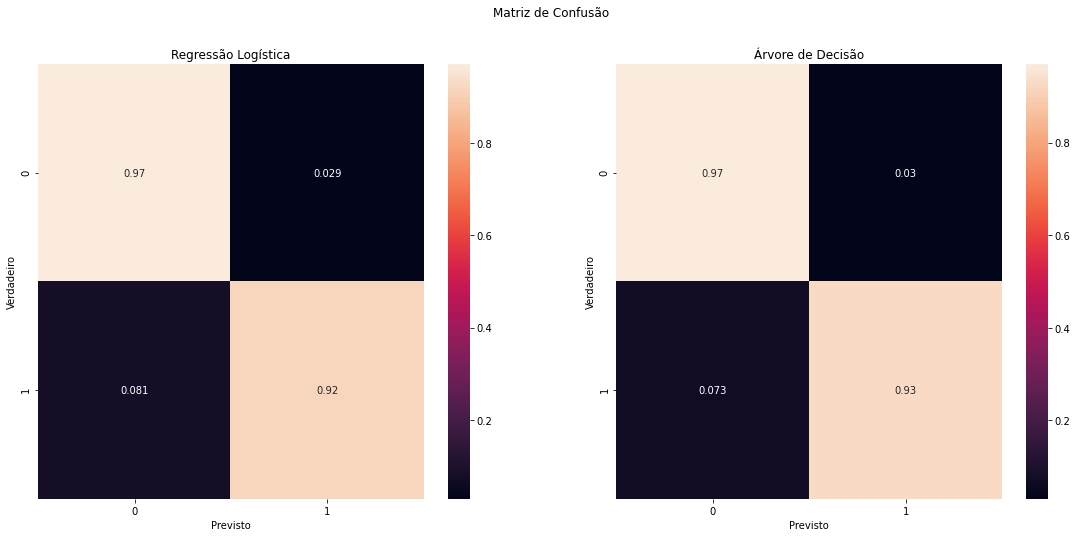

In [114]:
# plotar a matriz de confusão
fig, ax = plt.subplots(ncols=2, figsize=(19,8))
fig.suptitle('Matriz de Confusão')

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax[0])
ax[0].set_title('Regressão Logística')
ax[0].set_ylabel('Verdadeiro')
ax[0].set_xlabel('Previsto')

sns.heatmap(confusion_matrix(y_test, y2_pred, normalize='true'), annot=True, ax=ax[1])
ax[1].set_title('Árvore de Decisão')
ax[1].set_ylabel('Verdadeiro')
ax[1].set_xlabel('Previsto')

plt.show()

Na matriz de confusão vemos que não há tanta diferença entre os dois modelos, mas ganhamos 1% de acerto na detecção de fraudes, o que já indica que esse modelo pode ser melhor do que o anterior para detectar fraudes nos cartões de crédito. Outros pontos a serem notados são:

*  O modelo de Árvore de Decisão manteve os 97% de acerto na detecção de transações normais
*  O modelo de Árvore de Decisão detectou, erroneamente, 3% de fraudes quando na verdade eram transações normais, um aumento de 0.1% comparado ao modelo de Regressão Logística
*  O modelo de Árvore de Decisão detectou, erroneamente, 7.3% de transações normais quando na verdade eram transações fraudulentas, uma diminuição de 0.8% comparado ao modelo de Regressão Logística


Agora vamos imprimir o Relatório de Classificação para vermos nossas métricas para o modelo de Árvore de Decisão, vamos imprimir também a acurácia e o `Recall`.

In [115]:
# imprimir o relatório de classificação
print(f'Relatório de Classificação:\n\n{classification_report(y_test, y2_pred, digits=4)}')

Relatório de Classificação:

              precision    recall  f1-score   support

           0     0.9999    0.9698    0.9846     71079
           1     0.0505    0.9268    0.0957       123

    accuracy                         0.9697     71202
   macro avg     0.5252    0.9483    0.5402     71202
weighted avg     0.9982    0.9697    0.9831     71202



In [119]:
# imprimir a acurácia
print(f'Acurácia: {accuracy_score(y_test, y2_pred)*100:.4f}%')

Acurácia: 96.9748%


In [120]:
# imprimir o Recall
print(f'Recall: {recall_score(y_test, y2_pred)*100:.4f}%')

Recall: 92.6829%


Aqui percebemos algo interessante que comentamos anteriormente, neste tipo de problema é mais interessante diminuiur um pouco da acurácia pra aumentar o `Recall`. Mesmo que os valores sejam bem próximos, podemos afirmar que nosso modelo de Árvore de Decisão foi capaz de detectar corretamente mais de 92% de todas as transações fraudulentas. Enquanto o nosso modelo de Regressão Logística foi capaz de detectar menos fraudes. Em contrapartida a acurácia do modelo de Regressão Logística é um pouco maior do que a do modelo de Árvore de Decisão

## Conclusão

Em conclusão quero deixar claro que esse foi um projeto muito trabalhoso, pois, além de ser meu primeiro projeto de *machine learning*, foi um projeto onde tive que lidar com desbalanceamento dos dados e trabalhar com a maioria das colunas com nomes desconfigurados para proteger a privacidade das transações. Passar pela Análise Exploratório dos Dados, preparar os dados e depois criar, treinar e fazer previsões usando *machine learning* não foi fácil, mas chego no final deste projeto bem feliz por tê-lo concluído.

No final vimos que o modelo de Árvore de Decisão é mais indicado para este problema, mesmo o aumento parecendo (e apenas parecendo) pouco significativo. É claro que há outras maneiras de abordar o problema e construir modelos mais acertivos, mas o objetivo deste projeto é fazer um trabalho de introdução ao *machine learning*.

No mais, agradeço a quem leu até aqui e deixo os links do meu portifólio do Github e do meu LinkedIn para me acompanharem em outros projetos envolvendo *Machine Learning* e *Data Science*. Até mais.

[GitHub](https://github.com/johnsigma/meuPortifolio)

[LinkedIn](https://www.linkedin.com/in/john-cunha-a424721aa/)